https://github.com/openai/openai-cookbook/blob/main/examples/Clustering.ipynb

In [45]:
import numpy as np
import pandas as pd

df = pd.read_csv('../embedding/embeddings.csv')

# Convert to a list of strings of floats
df.embedding = df.embedding.apply(eval).apply(np.array)

In [46]:
from sklearn.cluster import KMeans

matrix = np.vstack(df.embedding)
n_clusters = 4

kmeans = KMeans(
	n_clusters = n_clusters, 
	init='k-means++',
	n_init=10,
	random_state=42
)
kmeans.fit(matrix)
df['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'Transcription K-means clusters in 2D using t-SNE')

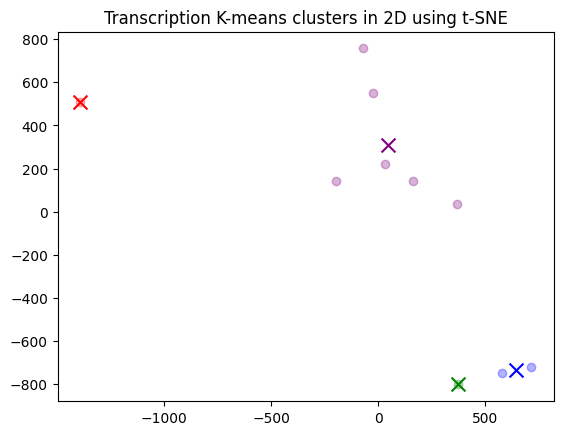

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(
	n_components=2, 
	perplexity=1, 
	random_state=42, 
	learning_rate="auto"
)
vis_dims2 = tsne.fit_transform(
	X=matrix
)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.cluster == category]
    ys = np.array(y)[df.cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Transcription K-means clusters in 2D using t-SNE")

In [48]:
videos_by_cluster = df.groupby('cluster')['video_name'].agg(list).reset_index()
videos_by_cluster['count'] = videos_by_cluster['video_name'].apply(len)
videos_by_cluster = videos_by_cluster.sort_values(
    by=['count'], 
		ascending=False
)
videos_by_cluster

,cluster,video_name,count
0,0,"[todayonline, usatoday, nowthisnews, forbesbre...",6
3,3,"[dummy-moby-dick, dummy-lose-yourself]",2
1,1,[dummy-genesis],1
2,2,[dummy-tsne-docs],1
